# imports

In [28]:

import os
import torch
from PIL import Image

import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [31]:
script_dir = os.getcwd()
parent_dir = os.path.dirname(script_dir)
datasets_dir = os.path.join(parent_dir, "datasets", "computer_vision")
datasets_dir

'c:\\Users\\deepa\\data\\workspace\\notebooks\\datasets\\computer_vision'

In [ ]:
torch.cuda.is_available()

True

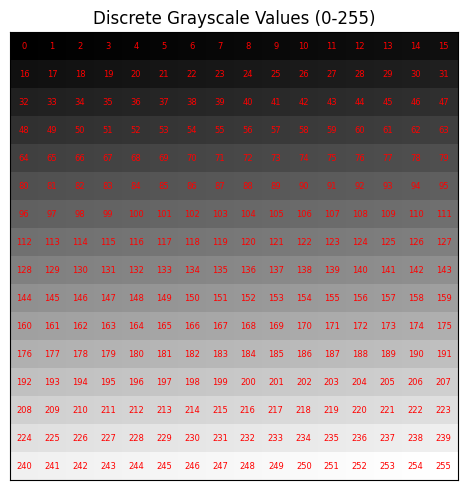

In [8]:
# @title
# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Number of grayscale values (0-255)
num_values = 256

# Calculate the grid dimensions (16x16 grid for 256 values)
grid_size = int(np.sqrt(num_values))
square_size = 1.0

# Initialize the plot with white background
ax.set_xlim(0, grid_size * square_size)
ax.set_ylim(0, grid_size * square_size)
ax.set_aspect('equal')

# Draw each shade of gray as a separate square
for i in range(num_values):
    # Calculate grid position (row, column)
    row = i // grid_size
    col = i % grid_size

    # Calculate position coordinates
    x = col * square_size
    y = (grid_size - 1 - row) * square_size  # Invert y to have 0 at the bottom

    # Calculate gray value (0-1 for matplotlib)
    gray_value = i / 255

    # Create and add the square
    square = Rectangle((x, y), square_size, square_size,
                      facecolor=(gray_value, gray_value, gray_value),
                      edgecolor='none')
    ax.add_patch(square)

    # Add text label (showing value) to every square - all in red
    ax.text(x + square_size/2, y + square_size/2, str(i),
            ha='center', va='center',
            color='red',
            fontsize=6)

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])

# Add title
plt.title('Discrete Grayscale Values (0-255)')

plt.tight_layout()
plt.show()

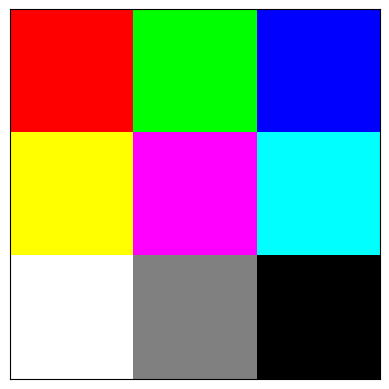

In [9]:
# Create a 3x3 RGB image array
rgb_image = np.array([
   # First row of pixels
   [[255, 0, 0],    # Pure red pixel
    [0, 255, 0],    # Pure green pixel
    [0, 0, 255]],   # Pure blue pixel

   # Second row of pixels
   [[255, 255, 0],  # Yellow pixel (red + green)
    [255, 0, 255],  # Magenta pixel (red + blue)
    [0, 255, 255]], # Cyan pixel (green + blue)

   # Third row of pixels
   [[255, 255, 255],# White pixel (all colors maximum)
    [128, 128, 128],# Gray pixel (all colors at half intensity)
    [0, 0, 0]]      # Black pixel (all colors minimum)
])
plt.xticks([])  # Remove x-axis ticks
plt.yticks([])  # Remove y-axis ticks
plt.imshow(rgb_image);

In [13]:
print(f"rgb_image.shape: {rgb_image.shape}")
print(f"rgb_image.dtype: {rgb_image.dtype}")
print(f"rgb_image.ndim: {rgb_image.ndim}")

rgb_image.shape: (3, 3, 3)
rgb_image.dtype: int64
rgb_image.ndim: 3


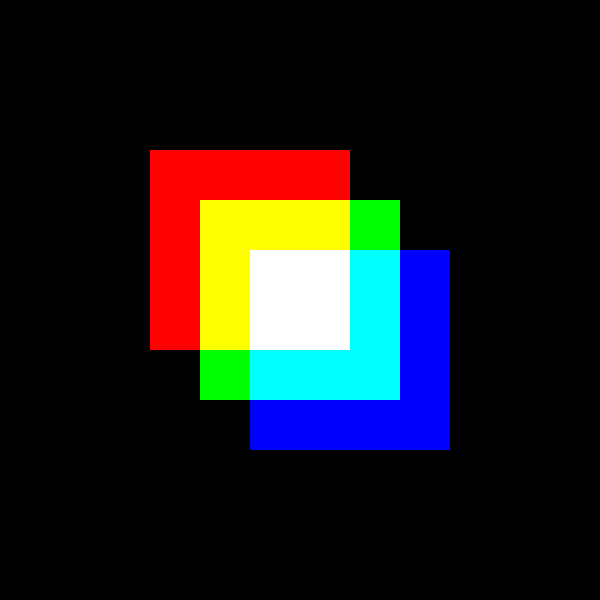

In [26]:
# Create arrays of of zeros
red = np.zeros((600, 600))
green = np.zeros((600, 600))
blue = np.zeros((600, 600))

# Set sections to maximum intensity
red[150:350, 150:350] = 255
green[200:400, 200:400] = 255
blue[250:450, 250:450] = 255

red_img = Image.fromarray(red).convert("L")
green_img = Image.fromarray(green).convert("L")
blue_img = Image.fromarray((blue)).convert("L")

# Merge channels
square_img = Image.merge("RGB", (red_img, green_img, blue_img))
square_img

In [27]:
# red.shape
# red.ndim
green[200:400, 200:400]

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], shape=(200, 200))

In [32]:
# Download the MNIST digits from torchvision.datasets
mnist_dataset = datasets.MNIST(
    root=os.path.join(datasets_dir, "data"),  # Specify the directory to store the dataset
    train=False,    # Download the test set
    download=True,  # Download if not already present
    #transform=transforms.ToImage(),  # Convert PIL images to torch tensors
)

len(mnist_dataset)

100.0%
100.0%
100.0%
100.0%


10000

In [84]:
print(mnist_dataset)
print(type(mnist_dataset))

Dataset MNIST
    Number of datapoints: 10000
    Root location: c:\Users\deepa\data\workspace\notebooks\datasets\computer_vision\data
    Split: Test
<class 'torchvision.datasets.mnist.MNIST'>


In [85]:
# What we get from the dataset is a list of tuples
# the images come alongside their labels
# Images are already in the PIL image format
print(f"mnist_dataset[0]: {mnist_dataset[0]}")
print(f"mnist_dataset[0][1]: {mnist_dataset[0][1]}")
mnist_dataset[0][0]

mnist_dataset[0]: (<PIL.Image.Image image mode=L size=28x28 at 0x23DCFDF5DC0>, 7)
mnist_dataset[0][1]: 7


In [86]:
# PIL images can be saved to disk as jpg or png files
mnist_dataset[0][0].save(os.path.join(datasets_dir, "gray_scale_image", "mnist_digit_7.jpg"))

In [87]:
# PIL images can be read to disk as jpg or png files
mnist_pil_image_7 = Image.open(os.path.join(datasets_dir, "gray_scale_image", "mnist_digit_7.jpg"))

In [88]:
print(type(mnist_pil_image_7))
print(mnist_pil_image_7.size)
print(mnist_pil_image_7.mode)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(28, 28)
L


In [89]:
# Convert PIL image to NumPy
mnist_7_np_array = np.array(mnist_pil_image_7)

In [90]:
print(f"mnist_7_np_array.shape: {mnist_7_np_array.shape}")
print(f"mnist_7_np_array.min(): {mnist_7_np_array.min()}")
print(f"mnist_7_np_array.max(): {mnist_7_np_array.max()}")
print(f"mnist_7_np_array.dtype: {mnist_7_np_array.dtype}")

mnist_7_np_array.shape: (28, 28)
mnist_7_np_array.min(): 0
mnist_7_np_array.max(): 255
mnist_7_np_array.dtype: uint8


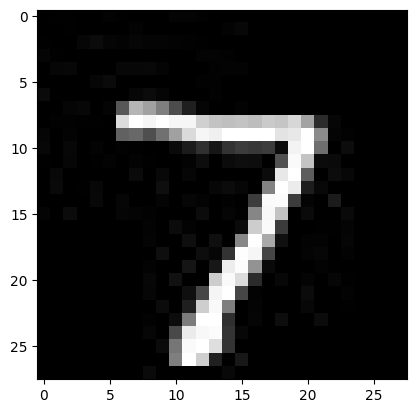

In [91]:
# PIL images are implicitly converted to NumPy and upsampled when passed to matplotlib

plt.imshow(mnist_pil_image_7, cmap="gray")

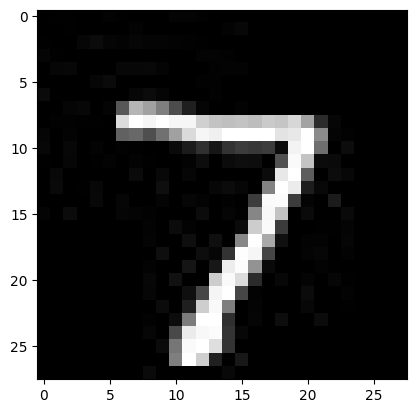

In [82]:
plt.imshow(mnist_7_np_array, cmap="gray")

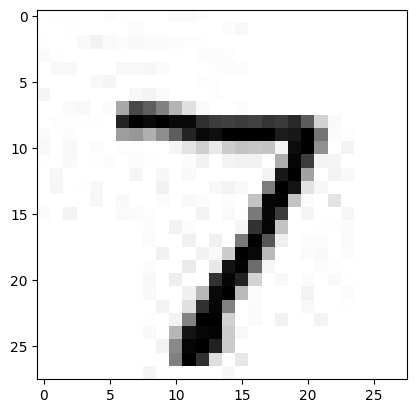

In [92]:
# 255 minus current pixel values with NumPy’s broadcasting
np_array_neg_mnist_7 = 255 - mnist_7_np_array
plt.imshow(np_array_neg_mnist_7, cmap="gray");

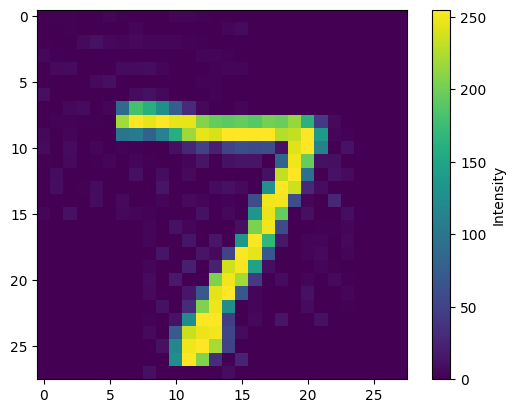

: 

In [ ]:
# The default color map (cmap) of matplotlib is 'viridis'
plt.imshow(mnist_pil_image_7, cmap='viridis')
# We add a colorbar to the plot
plt.colorbar(label='Intensity')
plt.show()